In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# Loading the datasets
# First let us normalize the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # normalize to [-1, 1]
])

train_dataset = datasets.CIFAR10(
    root = 'root',
    train = True,
    transform = transform,
    download = True
)

test_dataset = datasets.CIFAR10(
    root = 'data',
    train = False,
    transform = transform,
    download = True
)

In [3]:
# Wrap the datasets in dataloader for batching
train_loader = DataLoader(dataset = train_dataset, batch_size = 64, shuffle = True)
test_loader = DataLoader(dataset = test_dataset, batch_size = 64, shuffle = False)

In [4]:
# Define Neural Network
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32*32*3, 512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,10)   # We have 10 classes in CIFAR10 dataset
    
    def forward(self,x):
        x = x.view(-1, 32*32*3)              # flatten (batch_size, 3072)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
# Initialize model, loss, optimizer
model = SimpleNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [6]:
#Training loop
for epoch in range(10):   
    for images, labels in train_loader:
        outputs = model(images)         
        loss = loss_fn(outputs, labels)   

        optimizer.zero_grad()             
        loss.backward()                   
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss = {loss.item():.4f}")

Epoch 1, Loss = 1.5242
Epoch 2, Loss = 1.6801
Epoch 3, Loss = 0.9609
Epoch 4, Loss = 1.3855
Epoch 5, Loss = 1.2410
Epoch 6, Loss = 1.0393
Epoch 7, Loss = 1.2527
Epoch 8, Loss = 1.3072
Epoch 9, Loss = 0.6859
Epoch 10, Loss = 0.7879


<Axes: xlabel='Epoch', ylabel='Loss'>

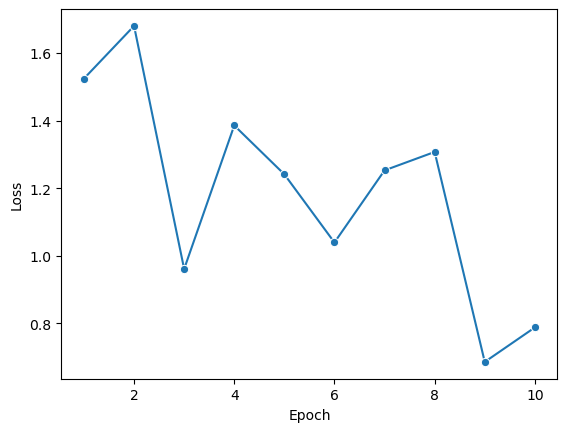

In [1]:
import seaborn as sns
import pandas as pd
loss_list = [1.5242,1.6801,0.9609,1.3855,1.2410,1.0393,1.2527,1.3072,0.6859,0.7879]
e_list = [x for x in range(1,11)]
df = pd.DataFrame({"Epoch": e_list, "Loss": loss_list})
sns.lineplot(data=df, x="Epoch", y="Loss", marker="o")

In [7]:
# Test Accuracy
correct, total = 0, 0
with torch.no_grad():  # no gradients during testing
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy = {100 * correct / total:.2f}%")

Test Accuracy = 52.97%
